In [30]:
import numpy as np
import pandas as pd
import yfinance as yf
from pypfopt import risk_models as RiskModels
from pypfopt import black_litterman
from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
from dateutil.relativedelta import relativedelta


In [31]:

tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0][['Symbol', 'GICS Sector']]
tickers

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology
...,...,...
498,YUM,Consumer Discretionary
499,ZBRA,Information Technology
500,ZBH,Health Care
501,ZION,Financials


In [32]:
# Replace all '.' with a '-' in the symbol column
type(tickers['Symbol'])

# Internally, Pandas columns are stored as Series objects, which are essentially NumPy arrays (with some extra methods and properties)
# This is why we can use NumPy's vectorized string methods on the column at once rather than looping through each row
tickers['Symbol'] = tickers['Symbol'].str.replace('.', '-')
tickers[tickers['Symbol'] == 'BF-B']

C:\Users\vkotr\AppData\Local\Temp\ipykernel_23636\3064236297.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tickers['Symbol'] = tickers['Symbol'].str.replace('.', '-')


,Symbol,GICS Sector
80,BF-B,Consumer Staples


In [33]:
# Breakdown dataframe into keys of sectors & values of tickers
sector_breakdown = tickers.groupby('GICS Sector')['Symbol'].apply(list)
sector_breakdown = sector_breakdown.to_dict()
sector_breakdown

{'Communication Services': ['GOOGL',
  'GOOG',
  'T',
  'CHTR',
  'CMCSA',
  'DIS',
  'EA',
  'FOXA',
  'FOX',
  'IPG',
  'LYV',
  'MTCH',
  'META',
  'NFLX',
  'NWSA',
  'NWS',
  'OMC',
  'PARA',
  'TMUS',
  'TTWO',
  'VZ',
  'WBD'],
 'Consumer Discretionary': ['ABNB',
  'AMZN',
  'APTV',
  'AZO',
  'BBWI',
  'BBY',
  'BKNG',
  'BWA',
  'CZR',
  'KMX',
  'CCL',
  'CMG',
  'DHI',
  'DRI',
  'DPZ',
  'EBAY',
  'ETSY',
  'EXPE',
  'F',
  'GRMN',
  'GM',
  'GPC',
  'HAS',
  'HLT',
  'HD',
  'LVS',
  'LEN',
  'LKQ',
  'LOW',
  'LULU',
  'MAR',
  'MCD',
  'MGM',
  'MHK',
  'NKE',
  'NCLH',
  'NVR',
  'ORLY',
  'POOL',
  'PHM',
  'RL',
  'ROST',
  'RCL',
  'SBUX',
  'TPR',
  'TSLA',
  'TJX',
  'TSCO',
  'ULTA',
  'VFC',
  'WHR',
  'WYNN',
  'YUM'],
 'Consumer Staples': ['ADM',
  'MO',
  'BF-B',
  'BG',
  'CPB',
  'CHD',
  'CLX',
  'KO',
  'CL',
  'CAG',
  'STZ',
  'COST',
  'DG',
  'DLTR',
  'EL',
  'GIS',
  'HSY',
  'HRL',
  'K',
  'KVUE',
  'KDP',
  'KMB',
  'KHC',
  'KR',
  'LW',
  'MKC',

In [34]:
# Get all tickers from sector_breakdown into a single list
ticker_list = []
for sector in sector_breakdown:
    ticker_list.extend(sector_breakdown[sector])

ticker_list   

['GOOGL',
 'GOOG',
 'T',
 'CHTR',
 'CMCSA',
 'DIS',
 'EA',
 'FOXA',
 'FOX',
 'IPG',
 'LYV',
 'MTCH',
 'META',
 'NFLX',
 'NWSA',
 'NWS',
 'OMC',
 'PARA',
 'TMUS',
 'TTWO',
 'VZ',
 'WBD',
 'ABNB',
 'AMZN',
 'APTV',
 'AZO',
 'BBWI',
 'BBY',
 'BKNG',
 'BWA',
 'CZR',
 'KMX',
 'CCL',
 'CMG',
 'DHI',
 'DRI',
 'DPZ',
 'EBAY',
 'ETSY',
 'EXPE',
 'F',
 'GRMN',
 'GM',
 'GPC',
 'HAS',
 'HLT',
 'HD',
 'LVS',
 'LEN',
 'LKQ',
 'LOW',
 'LULU',
 'MAR',
 'MCD',
 'MGM',
 'MHK',
 'NKE',
 'NCLH',
 'NVR',
 'ORLY',
 'POOL',
 'PHM',
 'RL',
 'ROST',
 'RCL',
 'SBUX',
 'TPR',
 'TSLA',
 'TJX',
 'TSCO',
 'ULTA',
 'VFC',
 'WHR',
 'WYNN',
 'YUM',
 'ADM',
 'MO',
 'BF-B',
 'BG',
 'CPB',
 'CHD',
 'CLX',
 'KO',
 'CL',
 'CAG',
 'STZ',
 'COST',
 'DG',
 'DLTR',
 'EL',
 'GIS',
 'HSY',
 'HRL',
 'K',
 'KVUE',
 'KDP',
 'KMB',
 'KHC',
 'KR',
 'LW',
 'MKC',
 'TAP',
 'MDLZ',
 'MNST',
 'PEP',
 'PM',
 'PG',
 'SJM',
 'SYY',
 'TGT',
 'TSN',
 'WBA',
 'WMT',
 'APA',
 'BKR',
 'CVX',
 'COP',
 'CTRA',
 'DVN',
 'FANG',
 'EOG',
 'EQT',
 'XO

In [35]:
# Get today's date
today = pd.Timestamp.today()

# Get the date 10 years ago
years_ago = today - relativedelta(years=10)

# Convert to string
today_str = today.strftime('%Y-%m-%d')
years_ago_str = years_ago.strftime('%Y-%m-%d')


print(years_ago, years_ago_str)

# Get data from yfinance for all tickers
data = yf.download(ticker_list, start=years_ago_str, end=today_str)

# Keep just the Adj Close column
data = data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
data

# IMPORTANT: Notice how yfinance doesn't throw an error for tickers like BF.B since we cleaned the inputs before extracting our dataset

2013-11-30 12:04:21.539334 2013-11-30
[*********************100%***********************]  503 of 503 completed


Adj Close                                                 \
                     A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2013-12-02   34.941231  21.720762   17.259237   32.124962         NaN   
2013-12-03   34.757374  21.107979   17.731712   33.173893         NaN   
2013-12-04   35.184196  20.617758   17.690386   32.974724         NaN   
2013-12-05   35.131657  21.070274   17.781185   33.034466         NaN   
2013-12-06   36.005028  21.258820   17.534460   34.090023         NaN   
...                ...        ...         ...         ...         ...   
2023-11-22  123.989998  12.310000  191.309998  138.470001  129.039993   
2023-11-24  126.620003  12.310000  189.970001  138.669998  128.369995   
2023-11-27  125.010002  12.180000  189.789993  139.089996  129.000000   
2023-11-28  124.709999  12.170000  190.399994  138.080002  127.559998   
2023-11-29  127.589996  12.230000  189.369995  138.500000  126.480003   

                                                                       ...  \
                   ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2013-12-02   31.446663  19.513332   64.096802   56.759998   38.753906  ...   
2013-12-03   31.001442  19.553333   64.734978   56.400002   39.682728  ...   
2013-12-04   30.803553  19.436666   63.878452   56.049999   39.319920  ...   
2013-12-05   30.440779  19.240000   63.643326   55.040001   39.360229  ...   
2013-12-06   30.943724  19.533333   63.425007   55.599998   39.723042  ...   
...                ...        ...         ...         ...         ...  ...   
2023-11-22  102.699997  85.949997  333.130005  619.719971  182.669998  ...   
2023-11-24  102.870003  86.599998  334.040009  619.429993  183.050003  ...   
2023-11-27  102.709999  87.000000  332.429993  619.270020  183.770004  ...   
2023-11-28  102.059998  84.449997  332.559998  623.320007  183.199997  ...   
2023-11-29  103.629997  82.379997  333.339996  617.390015  182.710007  ...   

                                                                      \
                  WYNN        XEL         XOM       XRAY         XYL   
Date                                                                   
2013-12-02  139.672058  20.353943   60.827431  43.710339   29.785242   
2013-12-03  138.459625  20.324781   61.393326  43.562740   29.495394   
2013-12-04  142.249496  20.397684   61.575436  43.618076   29.477819   
2013-12-05  145.327103  20.448715   61.224194  43.304420   29.671062   
2013-12-06  146.810806  20.740316   62.212852  44.162384   29.433910   
...                ...        ...         ...        ...         ...   
2023-11-22   87.529999  60.430000  104.010002  31.360001  102.220001   
2023-11-24   88.309998  60.520000  104.570000  31.320000  103.260002   
2023-11-27   87.059998  60.450001  103.959999  31.480000  103.180000   
2023-11-28   84.940002  60.970001  103.900002  31.480000  102.639999   
2023-11-29   83.669998  60.000000  102.339996  31.330000  103.500000   

                                                                       
                   YUM         ZBH        ZBRA       ZION         ZTS  
Date                                                                   
2013-12-02   46.187473   81.599342   52.189999  23.462879   28.999664  
2013-12-03   44.939316   81.196030   52.230000  23.205748   28.943810  
2013-12-04   44.969036   80.729927   51.560001  23.511087   29.055527  
2013-12-05   44.214195   81.070518   50.950001  23.430731   29.269644  
2013-12-06   44.202316   82.477722   51.860001  23.888741   29.362743  
...                ...         ...         ...        ...         ...  
2023-11-22  128.332977  113.830002  225.860001  34.410000  179.350006  
2023-11-24  127.904991  113.430000  228.919998  34.349998  180.210007  
2023-11-27  127.690002  113.839996  231.500000  34.400002  178.789993  
2023-11-28  126.389999  

In [36]:
# Backward fill NaN values
data = data.fillna(method='bfill', axis=0)

# Backward fill NaN values
data = data.fillna(method='ffill', axis=0)

# Print number of NA values across each column
print(data.isna().sum(axis=1))

# If you have NaN values still, then account for this when making calculations further down the line
# Using forward fill means we account for situations like this: 3.0 3.0 NaN NaN NaN NaN
# Using backward fill means we account for situations like this: NaN NaN NaN NaN 3.0 3.0

Date
2013-12-02    0
2013-12-03    0
2013-12-04    0
2013-12-05    0
2013-12-06    0
             ..
2023-11-22    0
2023-11-24    0
2023-11-27    0
2023-11-28    0
2023-11-29    0
Length: 2516, dtype: int64


In [37]:
# Calculate daily returns
returns = data.pct_change()

# Drop the index name Adj Close
returns = returns.droplevel(0, axis=1)

# Group tickers in returns dataframe by sector using sector_breakdown's keys & values
sector_mean_returns = {}

# Extract each key & value pair from sector_breakdown
for sector, tickers in sector_breakdown.items():
    # Get tickers for each sector
    sector_data = returns[tickers]

    # Calculate mean returns for each sector and add to dictionary
    sector_mean_returns[sector] = sector_data.mean(axis=1)

# Convert sector_mean_returns dict to a DataFrame
sector_mean_returns = pd.DataFrame(sector_mean_returns)

sector_mean_returns

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2013-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-03,-0.005185,-0.002488,0.005194,0.001810,-0.009852,-0.004093,-0.007901,0.001170,-0.008850,-0.001324,0.003851
2013-12-04,0.001033,-0.003588,0.000587,-0.007139,-0.000499,-0.005469,-0.003846,0.001129,0.006757,0.002335,0.003554
2013-12-05,-0.007277,-0.001852,-0.006323,-0.002537,-0.006350,-0.002578,-0.000433,0.000391,-0.005443,0.005292,-0.007205
2013-12-06,0.009156,0.004403,0.015026,-0.000741,0.014339,0.011326,0.011543,0.009137,0.013531,0.006707,0.012869
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,0.006904,0.006119,0.007962,-0.000162,0.004258,0.007057,0.002384,0.003831,0.002575,0.004305,0.006469
2023-11-24,0.001792,0.001815,0.004024,0.004753,0.003906,0.004940,0.003186,0.001381,0.004929,0.003332,0.002629
2023-11-27,-0.004245,-0.000550,-0.006666,-0.004263,-0.002491,-0.007191,-0.004590,-0.000857,-0.000951,0.002547,0.000974


In [43]:
# Drop rows that have NaN values
sector_mean_returns = sector_mean_returns.dropna()
# len(sector_mean_returns.columns)
pd.DataFrame(sector_mean_returns)
sector_mean_returns
sector_mean_returns.to_csv('10yBackData.csv')


In [39]:
shrunk_covariance = RiskModels.CovarianceShrinkage(sector_mean_returns)
shrunk_covariance = shrunk_covariance.shrunk_covariance()

This is where I pulled it from - https://www.kaggle.com/code/takahiro1127/portfolio-optimization-black-litterman-model

In [40]:
weight_set = []
P = np.array([
        [-0.3,-0.1,-0.2,-0.2,-0.1,-0.1,1, 0, 0, -0.8, 0.02],# BRL up 3%
        [1,0,0,0,0.5,0,0,0.3,0,0,0]]) # JPY up 1%
Q = np.array([[0.0003],[0.001]]) # 2-vector
delta = black_litterman.market_implied_risk_aversion(sector_mean_returns["Communication Services"])
Omega = BlackLittermanModel.default_omega(cov_matrix = shrunk_covariance, P = P, tau = 0.05)
bl = BlackLittermanModel(shrunk_covariance, P = P, Q = Q, omega = Omega)
rets = bl.bl_returns()
bl.bl_weights(delta)
weight = bl.clean_weights()

c:\Users\vkotr\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\black_litterman.py:259: UserWarning: Running Black-Litterman with no prior.
  warnings.warn("Running Black-Litterman with no prior.")


<Axes: >

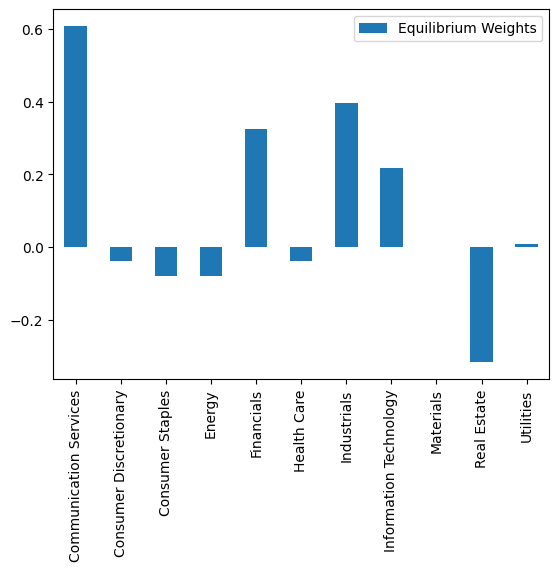

In [41]:
df = pd.DataFrame(weight,
                  columns=sector_mean_returns.columns,
                  index=['Equilibrium Weights'])
df.T.plot(kind='bar')